In [210]:
import pandas as pd
import numpy as np

## Dataset

In [211]:
df = pd.read_excel('/Users/animeshsingh/Desktop/Datasets/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [212]:
df.shape

(1030, 9)

## EDA

In [213]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [214]:
print(df.duplicated().sum())

25


In [215]:
df.drop_duplicates(subset = None, inplace = True, ignore_index = False)

In [216]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [217]:
print('removed ' + str(df.shape[0] - df_no_out.shape[0]) + ' rows with outliers')

removed 94 rows with outliers


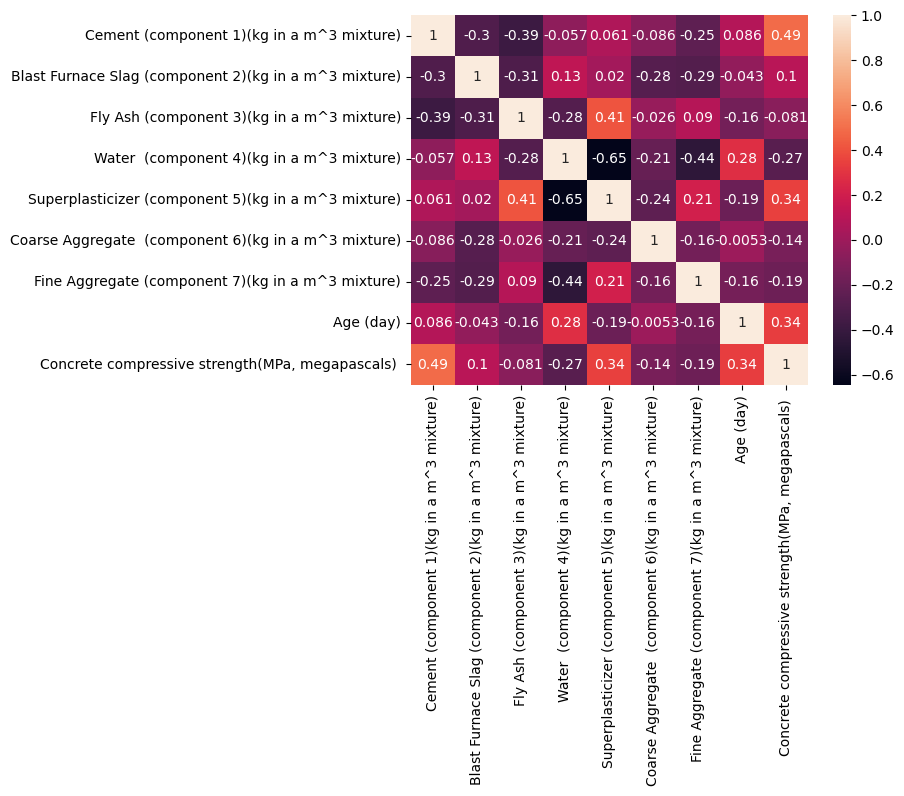

<Figure size 1200x800 with 0 Axes>

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True)
plt.figure(figsize=(12, 8))
plt.show()

could try removing 'Superplasticizer' or 'Water' but Dataset too small

In [219]:
print(df.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [220]:
df['Water/Cement'] = df[r'Water  (component 4)(kg in a m^3 mixture)'] / (df[r'Cement (component 1)(kg in a m^3 mixture)'] + 0.0001)
df['Total_Aggregate'] = df[r'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] + df[r'Fine Aggregate (component 7)(kg in a m^3 mixture)']
df['Binder'] = df[r'Cement (component 1)(kg in a m^3 mixture)'] + df[r'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] + df[r'Fly Ash (component 3)(kg in a m^3 mixture)']

In [221]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",Water/Cement,Total_Aggregate,Binder
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000,1716.0,540.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000,1731.0,540.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714,1526.0,475.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714,1526.0,475.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767,1803.9,331.0


In [222]:
X = df.drop(columns = ['Concrete compressive strength(MPa, megapascals) ', 
            'Cement (component 1)(kg in a m^3 mixture)',
            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
            'Fly Ash (component 3)(kg in a m^3 mixture)',
            'Water  (component 4)(kg in a m^3 mixture)',
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
            'Fine Aggregate (component 7)(kg in a m^3 mixture)'], axis = 1)

y = df['Concrete compressive strength(MPa, megapascals) ']

In [223]:
X.head()

,Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),Water/Cement,Total_Aggregate,Binder
0,2.5,28,0.300000,1716.0,540.0
1,2.5,28,0.300000,1731.0,540.0
2,0.0,270,0.685714,1526.0,475.0
3,0.0,365,0.685714,1526.0,475.0
4,0.0,360,0.966767,1803.9,331.0


In [224]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [225]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# <span style="color:blue">Regression</span>

# Linear Regression

In [226]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [227]:
class LinearRegressionScratch:
    
    def __init__(self):
        self.weights = None  
        self.bias = None 
    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X] 
        X_transpose = X_with_bias.T
        weights = np.linalg.inv(X_transpose @ X_with_bias) @ X_transpose @ y
        
        self.bias = weights[0]  
        self.weights = weights[1:] 
        
        return self
    
    def predict(self, X):
        return X @ self.weights + self.bias  

# training
lr = LinearRegressionScratch() 
lr.fit(X_train, y_train)  

y_pred_lr = lr.predict(X_test)  

# Eval
mse_lr = mean_squared_error(y_test, y_pred_lr) 
rmse_lr = np.sqrt(mse_lr)  
r2_lr = r2_score(y_test, y_pred_lr)  

print("Linear Regression (from scratch):")
print(f"MSE: {mse_lr:.2f}") 
print(f"RMSE: {rmse_lr:.2f}") 
print(f"R² Score: {r2_lr:.4f}") 

Linear Regression (from scratch):
MSE: 126.27
RMSE: 11.24
R² Score: 0.5767


# L2 reg.

In [228]:
class RidgeRegressionScratch:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha 
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        I = np.eye(X_with_bias.shape[1])  # Identity matrix
        I[0, 0] = 0  # Set first element to 0 (don't penalize bias term)
        
        X_transpose = X_with_bias.T
        weights = np.linalg.inv(X_transpose @ X_with_bias + self.alpha * I) @ X_transpose @ y
        
        self.bias = weights[0]  # Extract bias
        self.weights = weights[1:]  # Extract feature weights
        
        return self
    
    def predict(self, X):
        return X @ self.weights + self.bias

alphas = [0.1, 1.0, 10.0, 100.0] 
ridge_results = []  

# metrics
for alpha in alphas:  
    ridge = RidgeRegressionScratch(alpha=alpha)  
    ridge.fit(X_train, y_train)  
    y_pred = ridge.predict(X_test) 
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    ridge_results.append({'alpha': alpha, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
    print(f"Ridge (α={alpha}): MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

best_ridge = max(ridge_results, key=lambda x: x['R2'])
print(f"\nBest Ridge alpha: {best_ridge['alpha']} with R²={best_ridge['R2']:.4f}")

Ridge (α=0.1): MSE=126.27, RMSE=11.24, R²=0.5767
Ridge (α=1.0): MSE=126.27, RMSE=11.24, R²=0.5767
Ridge (α=10.0): MSE=126.37, RMSE=11.24, R²=0.5764
Ridge (α=100.0): MSE=127.74, RMSE=11.30, R²=0.5718

Best Ridge alpha: 0.1 with R²=0.5767


# PolyRegressor

In [230]:
poly = PolynomialFeatures(degree=2, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)  
X_test_poly = poly.transform(X_test)  


poly_scratch = LinearRegressionScratch()  
poly_scratch.fit(X_train_poly, y_train)  

y_pred_poly = poly_scratch.predict(X_test_poly) 

# metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)  
rmse_poly = np.sqrt(mse_poly) 
r2_poly = r2_score(y_test, y_pred_poly) 

print("Polynomial Regression (degree 2):")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R² Score: {r2_poly:.4f}")

Polynomial Regression (degree 2):
MSE: 80.74
RMSE: 8.99
R² Score: 0.7294


# Advanced Models

In [231]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVR, SVC
import xgboost as xgb
import lightgbm as lgb 
from catboost import CatBoostRegressor

### SVR

In [232]:
svr_model = SVR(kernel = 'rbf', C = 50, gamma = 'auto', epsilon = 0.1)  # Rbf kernel
svr_model.fit(X_train, y_train) 
y_pred_svr = svr_model.predict(X_test)  

# metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression:")
print(f"MSE: {mse_svr:.2f}, RMSE: {rmse_svr:.2f}, R²: {r2_svr:.4f}")

Support Vector Regression:
MSE: 212.50, RMSE: 14.58, R²: 0.2877


### Grad

In [233]:
gb_model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_model.fit(X_train, y_train)  
y_pred_gb = gb_model.predict(X_test) 

# metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print(f"MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.4f}")


Gradient Boosting Regressor:
MSE: 23.75, RMSE: 4.87, R²: 0.9204


### XGB

In [234]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42,
    n_jobs=-1  
)
xgb_model.fit(X_train, y_train) 
y_pred_xgb = xgb_model.predict(X_test) 

# metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.4f}")


XGBoost Regressor:
MSE: 25.44, RMSE: 5.04, R²: 0.9147


### LightGBM

In [235]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=100, 
    learning_rate=0.1,  
    max_depth=5,  
    random_state=42, 
    n_jobs=-1,  
    verbose=-1 
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)  

# metric
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regressor:")
print(f"MSE: {mse_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.4f}")

LightGBM Regressor:
MSE: 29.67, RMSE: 5.45, R²: 0.9005


### Catboost

In [236]:
model = CatBoostRegressor(loss_function='RMSE', iterations=1000, learning_rate=0.1, depth=6, verbose = 1000)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse_cat = mean_squared_error(y_test, y_pred)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(y_test, y_pred)

print(f"CatBoost Test MSE: {mse_cat:.4f}")
print(f"CatBoost Test RMSE: {rmse_cat:.4f}")
print(f"CatBoost Test R^2: {r2_cat:.4f}")

0:	learn: 14.9622167	total: 1.42ms	remaining: 1.42s
999:	learn: 1.3435823	total: 291ms	remaining: 0us
CatBoost Test MSE: 16.7266
CatBoost Test RMSE: 4.0898
CatBoost Test R^2: 0.9439


# <span style="color:red">Regression Comparison</span>

In [237]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', f'Ridge (α={best_ridge["alpha"]})', 'SVR', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost'],
    'mse': [mse_lr, mse_poly, best_ridge['MSE'], mse_svr, mse_gb, mse_xgb, mse_lgb, mse_cat],
    'rmse': [rmse_lr, rmse_poly, best_ridge['RMSE'], rmse_svr, rmse_gb, rmse_xgb, rmse_lgb, rmse_cat],
    'r2': [r2_lr, r2_poly, best_ridge['R2'], r2_svr, r2_gb, r2_xgb, r2_lgb, r2_cat]
})

# Sort by R² score (descending) to see best models first
regression_results = regression_results.sort_values('rmse', ascending = True)

print("Comparison")
print('-----------------------------------------------------')
print(regression_results.to_string(index = False)) 

Comparison
-----------------------------------------------------
                Model        mse      rmse       r2
             CatBoost  16.726604  4.089817 0.943932
    Gradient Boosting  23.745834  4.872970 0.920404
              XGBoost  25.436246  5.043436 0.914737
             LightGBM  29.674522  5.447433 0.900531
Polynomial Regression  80.741398  8.985622 0.729354
        Ridge (α=0.1) 126.274178 11.237178 0.576727
    Linear Regression 126.274297 11.237184 0.576727
                  SVR 212.497668 14.577300 0.287705


# <span style="color:blue">Classification</span>

### Creating binary feature

In [238]:
df['RCC_Suitable'] = ((df['Concrete compressive strength(MPa, megapascals) '] >= 20) & (df['Age (day)'] >= 28)).astype(int)

print("Class Distribution:-")
print(df['RCC_Suitable'].value_counts()) 

Class Distribution:-
RCC_Suitable
1    640
0    365
Name: count, dtype: int64


no need for data balancing as 65:35 is acceptable

#### Scaling the data for classification 
###### logistic regression needs scaled data. Other advanced algortihms work fine without it

In [239]:
from sklearn.preprocessing import StandardScaler
X_clf = df.drop(['Concrete compressive strength(MPa, megapascals) ', 'RCC_Suitable'], axis=1) 
y_clf = df['RCC_Suitable']  

X_train_clf, X_test_clf, y_train_clf, y_test = train_test_split(X_clf, y_clf, test_size = 0.2, random_state = 42, stratify = y_clf)

scaler_clf = StandardScaler() 
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)  
X_test_clf_scaled = scaler_clf.transform(X_test_clf) 

#### Smote for Balancing Data

In [249]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42) 
X_train_clf_balanced, y_train_clf_balanced = smote.fit_resample(X_train_clf_scaled, y_train_clf)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_clf_balanced).value_counts())  
print(f"\nOriginal training size: {len(y_train_clf)}")
print(f"Balanced training size: {len(y_train_clf_balanced)}") 

Class distribution after SMOTE:
RCC_Suitable
0    512
1    512
Name: count, dtype: int64

Original training size: 804
Balanced training size: 1024


# Logistic Regression

In [250]:
class LogisticRegressionScratch:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=0.0):
        self.learning_rate = learning_rate 
        self.n_iterations = n_iterations  
        self.alpha = alpha 
        self.weights = None 
        self.bias = None 
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape 
        
        self.weights = np.zeros(n_features)
        self.bias = 0  
        
        for i in range(self.n_iterations):  
            linear_model = X @ self.weights + self.bias  
            y_predicted = self.sigmoid(linear_model)  
            
            dw = (1 / n_samples) * (X.T @ (y_predicted - y)) + (self.alpha / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw  
            self.bias -= self.learning_rate * db
        
        return self
    
    def predict_proba(self, X):
        linear_model = X @ self.weights + self.bias  
        return self.sigmoid(linear_model)  
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

log_reg_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000, alpha=0.0)
log_reg_scratch.fit(X_train_clf_balanced, y_train_clf_balanced)  # Train on balanced data

y_pred_log = log_reg_scratch.predict(X_test_clf_scaled)  # Predict on test set
y_pred_proba_log = log_reg_scratch.predict_proba(X_test_clf_scaled)  # Get probabilities

# metrics
acc_log = accuracy_score(y_test_clf, y_pred_log)  # Proportion of correct predictions
prec_log = precision_score(y_test_clf, y_pred_log)  # TP / (TP + FP)
rec_log = recall_score(y_test_clf, y_pred_log)  # TP / (TP + FN)
f1_log = f1_score(y_test_clf, y_pred_log)  # Harmonic mean of precision and recall
roc_auc_log = roc_auc_score(y_test_clf, y_pred_proba_log)  # Area under ROC curve

print("Logistic Regression (from scratch):")
print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")
print(f"ROC-AUC: {roc_auc_log:.4f}")

Logistic Regression (from scratch):
Accuracy: 0.8706
Precision: 0.9722
Recall: 0.8203
F1-Score: 0.8898
ROC-AUC: 0.9743


# LogRegression with L2

In [251]:
log_reg_ridge = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000, alpha=1.0)
log_reg_ridge.fit(X_train_clf_balanced, y_train_clf_balanced)

y_pred_ridge = log_reg_ridge.predict(X_test_clf_scaled)
y_pred_proba_ridge = log_reg_ridge.predict_proba(X_test_clf_scaled)

# metrics
acc_ridge = accuracy_score(y_test_clf, y_pred_ridge)
prec_ridge = precision_score(y_test_clf, y_pred_ridge)
rec_ridge = recall_score(y_test_clf, y_pred_ridge)
f1_ridge = f1_score(y_test_clf, y_pred_ridge)
roc_auc_ridge = roc_auc_score(y_test_clf, y_pred_proba_ridge)

print("\nLogistic Regression with Ridge (L2) Regularization:")
print(f"Accuracy: {acc_ridge:.4f}")
print(f"Precision: {prec_ridge:.4f}")
print(f"Recall: {rec_ridge:.4f}")
print(f"F1-Score: {f1_ridge:.4f}")
print(f"ROC-AUC: {roc_auc_ridge:.4f}")


Logistic Regression with Ridge (L2) Regularization:
Accuracy: 0.8657
Precision: 0.9720
Recall: 0.8125
F1-Score: 0.8851
ROC-AUC: 0.9726


# Advanced Classification Models

### DT Class.

In [252]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_split=20,  
    random_state=42
)
dt_model.fit(X_train_clf_balanced, y_train_clf_balanced)  
y_pred_dt = dt_model.predict(X_test_clf_scaled) 
y_pred_proba_dt = dt_model.predict_proba(X_test_clf_scaled)[:, 1] 

# metrics
acc_dt = accuracy_score(y_test_clf, y_pred_dt)
prec_dt = precision_score(y_test_clf, y_pred_dt)
rec_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_pred_proba_dt)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall: {rec_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")


Decision Tree Classifier:
Accuracy: 0.9652
Precision: 0.9919
Recall: 0.9531
F1-Score: 0.9721
ROC-AUC: 0.9729


### RandomForest Class.

In [253]:
rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=10,  
    min_samples_split=20, 
    random_state=42,
    n_jobs=-1  
)
rf_model.fit(X_train_clf_balanced, y_train_clf_balanced)
y_pred_rf = rf_model.predict(X_test_clf_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_clf_scaled)[:, 1]

# metric
acc_rf = accuracy_score(y_test_clf, y_pred_rf)
prec_rf = precision_score(y_test_clf, y_pred_rf)
rec_rf = recall_score(y_test_clf, y_pred_rf)
f1_rf = f1_score(y_test_clf, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_clf, y_pred_proba_rf)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")


Random Forest Classifier:
Accuracy: 0.9701
Precision: 0.9621
Recall: 0.9922
F1-Score: 0.9769
ROC-AUC: 0.9979


### GradientBoost Class.

In [254]:
gb_clf_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_clf_model.fit(X_train_clf_balanced, y_train_clf_balanced)
y_pred_gb_clf = gb_clf_model.predict(X_test_clf_scaled)
y_pred_proba_gb_clf = gb_clf_model.predict_proba(X_test_clf_scaled)[:, 1]

# metrics
acc_gb_clf = accuracy_score(y_test_clf, y_pred_gb_clf)
prec_gb_clf = precision_score(y_test_clf, y_pred_gb_clf)
rec_gb_clf = recall_score(y_test_clf, y_pred_gb_clf)
f1_gb_clf = f1_score(y_test_clf, y_pred_gb_clf)
roc_auc_gb_clf = roc_auc_score(y_test_clf, y_pred_proba_gb_clf)

print("\nGradient Boosting Classifier:")
print(f"Accuracy: {acc_gb_clf:.4f}")
print(f"Precision: {prec_gb_clf:.4f}")
print(f"Recall: {rec_gb_clf:.4f}")
print(f"F1-Score: {f1_gb_clf:.4f}")
print(f"ROC-AUC: {roc_auc_gb_clf:.4f}")


Gradient Boosting Classifier:
Accuracy: 0.9801
Precision: 0.9769
Recall: 0.9922
F1-Score: 0.9845
ROC-AUC: 0.9988


### SVM

In [255]:
svm_model = SVC(kernel = 'rbf', C = 10, gamma = 'scale', probability = True, random_state = 42)
svm_model.fit(X_train_clf_balanced, y_train_clf_balanced)
y_pred_cat = svm_model.predict(X_test_clf_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_clf_scaled)[:, 1]

# metrics
acc_svm = accuracy_score(y_test_clf, y_pred_cat)
prec_svm = precision_score(y_test_clf, y_pred_cat)
rec_svm = recall_score(y_test_clf, y_pred_cat)
f1_svm = f1_score(y_test_clf, y_pred_cat)
roc_auc_svm = roc_auc_score(y_test_clf, y_pred_proba_svm)

print("\nSupport Vector Machine Classifier:")
print(f"Accuracy: {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall: {rec_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")


Support Vector Machine Classifier:
Accuracy: 0.9652
Precision: 0.9840
Recall: 0.9609
F1-Score: 0.9723
ROC-AUC: 0.9972


### Catboost

In [256]:
from catboost import CatBoostClassifier           

cat_model = CatBoostClassifier(
    iterations = 1000,             
    learning_rate = 0.1,           
    depth = 6,                    
    loss_function = 'Logloss',    
    verbose = 1000                 
)

cat_model.fit(X_train_clf_balanced, y_train_clf_balanced)

y_pred_cat = cat_model.predict(X_test_clf_scaled)
y_pred_proba_cat = cat_model.predict_proba(X_test_clf_scaled)[:, 1]

# metrics
acc_cat = accuracy_score(y_test_clf, y_pred_cat)
prec_cat = precision_score(y_test_clf, y_pred_cat)
rec_cat = recall_score(y_test_clf, y_pred_cat)
f1_cat = f1_score(y_test_clf, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test_clf, y_pred_proba_cat)    

print("\nCatboost Classifier:")
print(f"Accuracy: {acc_cat:.4f}")
print(f"Precision: {prec_cat:.4f}")
print(f"Recall: {rec_cat:.4f}")
print(f"F1-Score: {f1_cat:.4f}")
print(f"ROC-AUC: {roc_auc_cat:.4f}")

0:	learn: 0.5227160	total: 2ms	remaining: 1.99s
999:	learn: 0.0021446	total: 438ms	remaining: 0us

Catboost Classifier:
Accuracy: 0.9801
Precision: 0.9769
Recall: 0.9922
F1-Score: 0.9845
ROC-AUC: 0.9984


# <span style="color:red">Classification Comparison</span>

In [258]:
classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic + Ridge', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'SVM', 'CatBoost'],
    'Accuracy': [acc_log, acc_ridge, acc_dt, acc_rf, acc_gb_clf, acc_svm, acc_cat],
    'Precision': [prec_log, prec_ridge, prec_dt, prec_rf, prec_gb_clf, prec_svm, prec_cat],
    'Recall': [rec_log, rec_ridge, rec_dt, rec_rf, rec_gb_clf, rec_svm, rec_cat],
    'F1-Score': [f1_log, f1_ridge, f1_dt, f1_rf, f1_gb_clf, f1_svm, f1_cat],
    'ROC-AUC': [roc_auc_log, roc_auc_ridge, roc_auc_dt, roc_auc_rf, roc_auc_gb_clf, roc_auc_svm, roc_auc_cat]
})

classification_results = classification_results.sort_values('ROC-AUC', ascending=True)

print("Classsification Comparison")
print('------------------------------------------------------------------------')
print(classification_results.to_string(index = False))

Classsification Comparison
------------------------------------------------------------------------
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
   Logistic + Ridge  0.865672   0.971963 0.812500  0.885106 0.972603
      Decision Tree  0.965174   0.991870 0.953125  0.972112 0.972924
Logistic Regression  0.870647   0.972222 0.820312  0.889831 0.974315
                SVM  0.965174   0.984000 0.960938  0.972332 0.997217
      Random Forest  0.970149   0.962121 0.992188  0.976923 0.997860
           CatBoost  0.980100   0.976923 0.992188  0.984496 0.998395
  Gradient Boosting  0.980100   0.976923 0.992188  0.984496 0.998823
